# 1 Author

- Jiahao Meng

# 2 Problem formulation

#### What we have:
- An Extra Trees Classifier which has trained in basic part:
    - Trained with all features;
    - Testing accuracy is only 0.607, even with the best parameter.

#### What we need:
- Improve it with **Transition Stage** and **Voting Classifier**.

# 3 Machine Learning pipeline

Audio files --> Transformation --> Training --> Optimisation & Validation (--> Vote System) -->Testing --> Song Lable: Harry/StarWars?

# 4 Transform stage

- Audio files --> Feature Extraction --> Feature Selection --> Outlier Detection --> Normalisation --> Reduction --> Features

## 4.1 Feature Extraction
- Get any potential useful features at once, then store them in the dataframe to avoid time waste:
    - Essential features: power, pitch_mean, pitch_std, voiced_fr;
    - Additional features: rms, chroma_stft, spec_cent, spec_bw, rolloff, zcr, mfc.

> Applications of Audio Processing:
https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html

## 4.2 Feature Selection

- The importance of feature selection:
    1. Improves the accuracy of a model if the suitable subset is chosen;
    2. Enables the machine learning algorithm to train faster;
    3. Reduces the complexity of a model and makes it easier to interpret;
    4. Reduces Overfitting.
    
    
- It is better to use Wrapper methods than Filter methods and Embedded methods:
    - The advantage of this approach is that it will not remove variables that were deemed insignificant at the beginning of the process, but become more and more significant as lesser features are removed;
    - RFE performs a greedy search to find the best performing feature subset. It iteratively creates models and determines each iteration's best or worst performing feature. It constructs the subsequent models with the left features until they are explored;
    - RFECV is a slight tweak to RFE that uses cross-validation to determine the optimal stopping point in the number of columns.



> Automated feature selection with sklearn:
https://www.kaggle.com/residentmario/automated-feature-selection-with-sklearn

> Beginner's Guide to Feature Selection in Python:
https://www.datacamp.com/community/tutorials/feature-selection-python

## 4.3 Outlier Detection
- Not everyone follows even the straightforward instructions; there is no reason to believe every sample.

> Reference: https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/

## 4.4 Data Normalisation
- Data are normalised to make the resulting mining process more efficient, and the patterns found may be easier to understand;
- The measurement unit used in an attribute can affect data analysis. In normalization, attributes are scaled to fall within a smaller, speciﬁed range, such that all attributes have equal weight in the analysis.

### 4.4.1  Min-Max Normalisation
- Suitable for: All features have the same scale, but it does not handle outliers well.

### 4.4.2 Z-Score scaling
- Suitable for: Handles outliers but does not produce normalized data with the same scale.

## 4.5 Data Reduction: PCA
- Complex analysis may take a very long time to run on a complete data set;
- PCA (Principal Component Analysis) is mainly used to reduce the size of the feature space while retaining as much of the information as possible. Here, all the features were transformed into 2 features using PCA.

# 5 Modelling
Based on the basic part, we had followed classification models which have better performance:
- Extra Trees Classifier
- Random Forest Classifier

# 6 Methodology

> There is simply no guarantee that any feature selection (backward, forward, recursive - you name it) will lead to better performance in general. None at all. Such tools are there for convenience only - they may work, or they may not. The best guide and ultimate judge is always the **experiment**. https://stackoverflow.com/questions/61441974/recursive-feature-selection-may-not-yield-higher-performance/61444056#61444056

## 6.1 Training 
- Unfortunately, we cannot theoretically determine which model matches which database can have better performance, so we need to verify each combination as much as possible.

- To evaluate models effectively, we need to split out datasets into three parts:
    1. Training dataset (60%)
    2. Validation dataset (20%)
    3. Testing dataset (20%)

## 6.2 Optimisation & Validation
- Once we find the 2 best transformation methods for different models based the accuracy, we can use them to find the best hyperparameter(s) by GridSearchCV:
    - GridSearchCV offers a convenient way to choose hyperparameters based on cross-validation.
    
- Select the best classifier based on the accuracy score from GridSearchCV
    

## 6.3 Testing
- **Test and assess** the best model with the best parameters:
    - Use confusion_matrix and classification_report from sklearn.metrics;
    - Pay more attention to accuracy instead of f1 score because of the balanced datasets and split randomly.

### 6.3.3.1 Voting Classifier
- A machine learning model trains on numerous models and predicts an output (class) based on their highest probability of chosen class as the output.

> Thanks to one of our teaching assistants for this great idea.

### 6.3.3.2 Comparison
- Control variable:
    - Assess the same model with the same parameters in the initial dataset;
    - Compare the confusion matrix.

# 7 Dataset

- Datasets we will create after Transforming:
    1. Initial dataset
    2. MinMax dataset
    3. Z-Score dataset
    4. PCA (Initial) dataset
    5. PCA (MinMax) dataset
    6. PCA (Z-score) dataset

## 7.1 Data
- Row dataset:
    - The names of each file should be:
    - [participant_ID]\_hum_1_[song label];
    - [participant_ID]\_hum_2_[song label];
    - [participant_ID]\_whistle_1_[song label];
    - [participant_ID]\_whistle_2_[song label].

- However, **Not everyone follows** straightforward instructions.
- Hence, we need to **verify and correct** the data.

In [1]:
import os, sys, re, pickle, glob
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
from tqdm import tqdm
import sklearn

In [2]:
sample_path = 'ML_data/*/*.*'
files = glob.glob(sample_path)
print ('We have {0} recordings.'.format(len(files)))

We have 834 recordings.


In [3]:
# Create a dataframe to store the essential attribute(s)
col = ['file_id','song']
MLENDHW_df = pd.DataFrame(np.NaN, index = np.arange(0,len(files),1), columns = col)
MLENDHW_df['file_id'] = files

# Assign song labels based on different folder names
for i in range(len(MLENDHW_df)):
    MLENDHW_df.iloc[i, MLENDHW_df.columns.get_loc('song')] = MLENDHW_df.iloc[i]['file_id'].split('/')[1]
MLENDHW_df = MLENDHW_df.set_index('file_id')
MLENDHW_df['song'].value_counts()
MLENDHW_df.head()

song
file_id                                     
ML_data/Potter/S54_hum_2_Potter.wav   Potter
ML_data/Potter/S135_hum_2_Potter.wav  Potter
ML_data/Potter/S36_hum_1_Potter.wav   Potter
ML_data/Potter/S157_hum_1_Potter.wav  Potter
ML_data/Potter/S169_hum_1_Potter.wav  Potter

In [4]:
# Verify the labels
MLENDHW_df['song'].value_counts()

StarWars    417
Potter      417
Name: song, dtype: int64

- Based on the Mini-project description File, the model need to predicts the song label either Harry or StarWars.
- Therefore, replace the 'Potter' with 'Harry'

In [5]:
MLENDHW_df['song'][MLENDHW_df['song'] == 'Potter'] = 'Harry'
MLENDHW_df['song'].value_counts()

StarWars    417
Harry       417
Name: song, dtype: int64

## 7.2 Transform
### 7.2.1 Feature Extraction

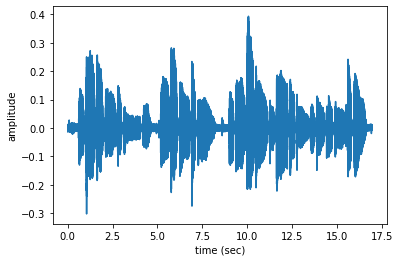

song    Harry
Name: ML_data/Potter/S54_hum_2_Potter.wav, dtype: object

In [6]:
# Thanks for the starter kit
n=0
sr = 44100 
x, sr = librosa.load(files[n],sr=sr)
t = np.arange(len(x))/sr
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(files[n]))
MLENDHW_df.iloc[n]

In [7]:
def getPitch(x,sr,winLen=0.02):
    #winLen = 0.02 
    p = winLen*sr
    frame_length = int(2**int(p-1).bit_length())
    hop_length = frame_length//2
    f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=sr,
                                                 frame_length=frame_length,hop_length=hop_length)
    return f0,voiced_flag

def get_features(files,labels_file):
    X,y =[],[]
    for file in tqdm(files):
        yi = labels_file.loc[file]['song']
        
                                              
        x, sr = librosa.load(file, sr=44100)
        f0, voiced_flag = getPitch(x,sr,winLen=0.02)
        
        power = np.sum(x**2)/len(x)
        pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
        pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
        voiced_fr = np.mean(voiced_flag)
        
        rms = librosa.feature.rms(x)
        chroma_stft = librosa.feature.chroma_stft(x, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(x, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(x, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(x, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(x)
        mfcc = librosa.feature.mfcc(x, sr=sr)
        xi = [power, pitch_mean, pitch_std, voiced_fr, 
              np.mean(rms), np.mean(chroma_stft), np.mean(spec_cent), 
              np.mean(spec_bw), np.mean(rolloff), np.mean(zcr)]
        for e in mfcc:
            xi.append(np.mean(e))
                                      
        X.append(xi)
        y.append(yi)

    return np.array(X),np.array(y)

In [8]:
X,y = get_features(files, labels_file = MLENDHW_df)

100%|██████████| 834/834 [18:06<00:00,  1.30s/it]


In [9]:
# Store all features in the dataframe to avoid time waste
col = ['power', 'pitch_mean', 'pitch_std', 'voiced_fr',
       'rms','chroma_stft','spec_cent', 'spec_bw','rolloff', 'zcr', 
       'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 
      'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 
      'mfcc_11', 'mfcc_12', 'mfcc_13', 'mfcc_14', 'mfcc_15',
      'mfcc_16', 'mfcc_17', 'mfcc_18', 'mfcc_19', 'mfcc_20']
features = pd.DataFrame(X, index = np.arange(0,len(X),1), columns = col)
features['song'] = y
features

power  pitch_mean  pitch_std  voiced_fr       rms  chroma_stft  \
0    0.003052  190.417149  50.864984   0.761286  0.044459     0.385606   
1    0.001044  163.599373  36.483218   0.837442  0.025696     0.369473   
2    0.001093  175.055281  30.935956   0.781818  0.026082     0.326766   
3    0.001100  328.123816  63.809047   0.873926  0.026810     0.240389   
4    0.000301  287.373148  43.199989   0.708982  0.013336     0.321363   
..        ...         ...        ...        ...       ...          ...   
829  0.002493  231.432478  57.359071   0.774689  0.042084     0.331719   
830  0.020877  405.208867  33.260235   0.774981  0.093458     0.195716   
831  0.003582  186.740685  38.114051   0.848694  0.048981     0.339757   
832  0.001153  378.193942  79.055452   0.588897  0.022066     0.366672   
833  0.000176  353.311610  61.045785   0.834261  0.010163     0.226655   

       spec_cent      spec_bw      rolloff       zcr  ...    mfcc_12  \
0    1675.204038  3065.165898  2849.997495  0.019332  ...   9.028441   
1    1659.010167  3177.825718  2996.482908  0.028275  ...  -4.836066   
2    2132.550131  2873.497796  3873.793126  0.064123  ...  -8.495154   
3    1932.344222  3112.003116  3602.106920  0.042381  ... -19.055544   
4    2257.836962  4246.474464  4508.408028  0.025941  ...  -4.388329   
..           ...          ...          ...       ...  ...        ...   
829  1860.893273  3112.447059  3460.292804  0.027326  ...  12.112650   
830  2775.112649  3009.801995  4982.298666  0.078699  ...   0.227998   
831  1643.143014  2804.135389  3355.111202  0.027606  ...  -4.798544   
832  2719.979938  4198.495497  5460.747678  0.043782  ...  -0.873236   
833  3822.862791  4796.683804  6938.418857  0.096396  ...  -4.323521   

       mfcc_13    mfcc_14    mfcc_15    mfcc_16   mfcc_17    mfcc_18  \
0     6.223410  -8.596852  -2.297908  -4.239172 -4.558042 -10.959394   
1    -3.286189  -2.981515  -8.571086  -9.878811 -4.143748  -2.277181   
2    -7.217812 -22.594255 -23.461632  -8.656265 -4.932810 -14.356619   
3   -11.107067  -3.579709 -14.142939 -15.667487 -2.266381  -2.766565   
4    -3.727430  -0.236710  -8.469546  -4.573374 -1.898902  -8.878784   
..         ...        ...        ...        ...       ...        ...   
829   0.932452 -19.251062 -13.094616  -0.769233 -4.398502  -4.590833   
830   7.313174   3.584602  -2.560793  -3.585562 -0.964728   1.899497   
831  -7.256934 -11.297347 -12.600592  -8.131459 -3.863375  -2.929201   
832   6.155696  13.969900   9.597282   3.716655  6.163775   3.814223   
833 -13.337029 -12.709845   4.332189   6.701385  1.994825   2.457891   

       mfcc_19    mfcc_20      song  
0    -5.215251  -6.671832     Harry  
1    -8.926064 -14.712740     Harry  
2   -16.773382  -8.207474     Harry  
3   -10.478158  -2.765479     Harry  
4    -4.827067  -1.811098     Harry  
..         ...        ...       ...  
829  -5.222107 -12.472143  StarWars  
830   4.021675   4.246054  StarWars  
831  -9.988239 -18.541967  StarWars  
832   6.353235   8.273810  StarWars  
833   7.015620  14.084597  StarWars  

[834 rows x 31 columns]

In [10]:
# Avoid contamination of raw data.
X = np.array(features[col]).copy()
y = np.array(features['song']).copy()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2, random_state = 3)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,test_size=0.25, random_state = 4)

In [12]:
# 1st training

from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=31, random_state = 0)
etc.fit (X_train, y_train)

print('Training accuracy of {0} with zscore data is: {1:.3f}'.format('etc', etc.score(X_train, y_train)))
print('Validation accuracy of {0} with zscore data is: {1:.3f}'.format('etc', etc.score(X_val, y_val)))
print('******')

Training accuracy of etc with zscore data is: 1.000
Validation accuracy of etc with zscore data is: 0.575
******


### 7.2.2 Feature Selection

Optimal number of features: 6


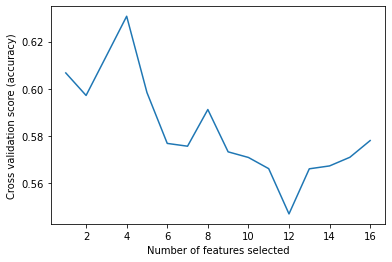

In [13]:

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
etc = ExtraTreesClassifier(n_estimators=31, random_state=0)

# The "accuracy" scoring shows the proportion of correct classifications
min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator = etc,
    step = 2,
    cv = StratifiedKFold(4),
    scoring = "accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X, y)

print(f'Optimal number of features: {rfecv.n_features_}') 

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

In [14]:
# Extract features we selected
feature_select = pd.DataFrame(rfecv.support_, columns = ['selected'], index = col)
feature_select['rank'] = rfecv.ranking_
feature_select.sort_values('rank')
col_select = feature_select[feature_select['selected'] == True].index
feature_select.sort_values('rank').head()

selected  rank
mfcc_7          True     1
pitch_mean      True     1
pitch_std       True     1
voiced_fr       True     1
mfcc_3          True     1

In [15]:
X = np.array(features[col_select]).copy()
y = np.array(features['song']).copy()

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2, random_state = 3)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state = 4)

In [17]:
# 2nd traning (features selected)
etc = ExtraTreesClassifier(n_estimators=31, random_state = 0)
etc.fit (X_train, y_train)

print('Training accuracy of {0} with zscore data is: {1:.3f}'.format('etc', etc.score(X_train, y_train)))
print('Validation accuracy of {0} with zscore data is: {1:.3f}'.format('etc', etc.score(X_val, y_val)))

Training accuracy of etc with zscore data is: 1.000
Validation accuracy of etc with zscore data is: 0.599


### 7.2.3 Outlier Detection
- To better understand the result of outlier detection, we can compare the attributes via PCA before and after outlier detection. (more details on 7.2.5 Data Reduction: PCA)

In [18]:
# Define a function which can visualize PCA and return the PCA data.
def visual_PCA(data, output_data = False, visual = False):
    from sklearn.decomposition import PCA
    numComponents = 2
    pca = PCA(n_components=numComponents)
    pca.fit(data)
    pca_data = pca.transform(data)
    print('Variance of each component:',
                   pca.explained_variance_ratio_)
    
    # Display a scatterplot of the two principal components
    if visual:
        X_pca_df = pd.DataFrame(data = pca_data, columns = ['pc1', 'pc2'])
        y_pca_df = pd.DataFrame(y, columns = ['song'])
        pca_df = pd.concat((X_pca_df, y_pca_df), axis=1)

        fig = plt.figure(figsize = (7,7))
        ax = fig.add_subplot(1,1,1)
        ax.scatter(pca_df['pc1'][pca_df['song'] == 'Harry'], 
                   pca_df['pc2'][pca_df['song'] == 'Harry'], 
                   color = '#005CAF', label = 'Harry')
        
        ax.scatter(pca_df['pc1'][pca_df['song'] == 'StarWars'], 
                   pca_df['pc2'][pca_df['song'] == 'StarWars'],
                   color = '#00AA90', label = 'StarWars')

        ax.set_xlabel('First Principal Component ', fontsize = 13) 
        ax.set_ylabel('Second Principal Component ', fontsize = 13) 
        ax.set_title('PCA', fontsize = 17)
        ax.legend()
        plt.show()
    
    if output_data:
        return (pca_data)

Variance of each component: [0.5118432 0.4481711]


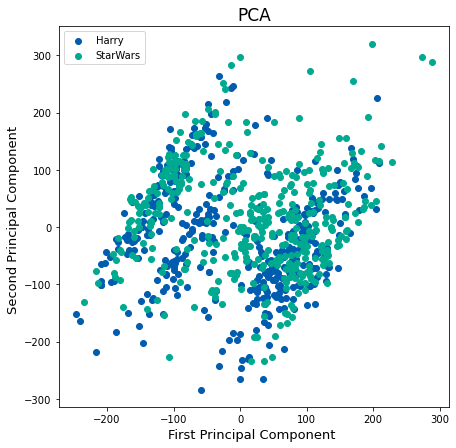

In [19]:
# Initial dataset
visual_PCA(X, visual = True)

In [20]:
# define a outlier detection, which can display the outlier randomly 
# for double checked manually / automatically, and return the inliers.

def outlier_detect(data_X, data_y, n_neighbors, output_data = False):
    from sklearn.neighbors import LocalOutlierFactor
    from sklearn.metrics import mean_absolute_error

    # identify outliers in the entire dataset
    lof = LocalOutlierFactor(n_neighbors)
    yhat = lof.fit_predict(data_X)
    
    # extract the outliers(-1)
    outlier = (yhat == -1)
    temp = []
    for i in range(len(outlier)):
        if outlier[i]:
            temp.append(files[i])
    print ('There are {0} outliers which is {1:.2f}% of the entire dataset.'
           .format(len(temp), len(temp)/len(X)*100))        
    print ('Play one of the outliers randomly:')
    ran = np.random.randint(0, len(temp))
    display(ipd.Audio(temp[ran]))
    
    # return the inliers
    X_in = data_X[yhat != -1]
    y_in = data_y[yhat != -1]
    if output_data:
        return (X_in, y_in)
    
    # If we do not want to check them manually, we can refer to the MAE
    # evaluate SVM model performance with outliers removed using local outlier factor:

    # X_train, y_train = X_train[mask, :], y_train[mask]   
    # # summarize the shape of the updated training dataset
    # print(X_train.shape, y_train.shape)
    # # fit the model
    # model = SVC(C=1)
    # model.fit(X_train, y_train)
    # # evaluate the model
    # yhat = model.predict(X_test)
    # # evaluate predictions
    # mae = mean_absolute_error(y_test, yhat)
    # print('MAE: %.3f' % mae)

There are 14 outliers which is 1.68% of the entire dataset.
Play one of the outliers randomly:


Variance of each component: [0.52663076 0.43352377]


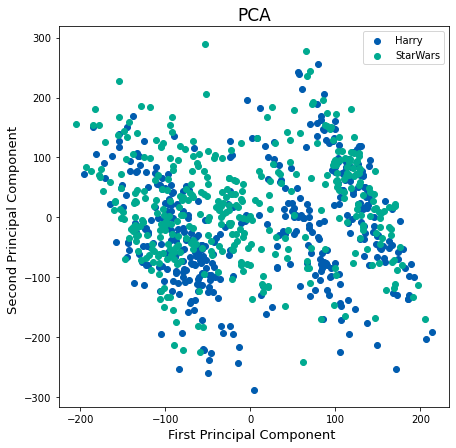

In [21]:
# Return the inliers
X_in, y_in = outlier_detect(X, y, n_neighbors = 12
                            , output_data = True)

# Visualize the results of outlier eliminated, do not return the PCA data
visual_PCA(X_in, visual = True, output_data = False)

In [22]:
# Split the inlier dataset
X_train, X_val, y_train, y_val = train_test_split(X_in, y_in, test_size=0.2, random_state = 3)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state = 4)

In [23]:
# 3rd training (Outlier Detection)
etc = ExtraTreesClassifier(n_estimators=31, random_state = 0)
etc.fit (X_train, y_train)

print('Training accuracy of {0} with zscore data is: {1:.3f}'.format('etc', etc.score(X_train, y_train)))
print('Validation accuracy of {0} with zscore data is: {1:.3f}'.format('etc', etc.score(X_val, y_val)))
print('******')

Training accuracy of etc with zscore data is: 1.000
Validation accuracy of etc with zscore data is: 0.677
******


### 7.2.4 Data Normalisation
#### 7.2.4.1 Min-Max Normalisation

In [24]:
from sklearn.preprocessing import minmax_scale
X_minmax = minmax_scale(X_in)

#### 7.2.4.2 Z-Score Scaling

In [25]:
from scipy.stats import zscore
X_zscore = zscore(X_in)

### 7.2.5 Data Reduction: PCA

Variance of each component: [0.52663076 0.43352377]


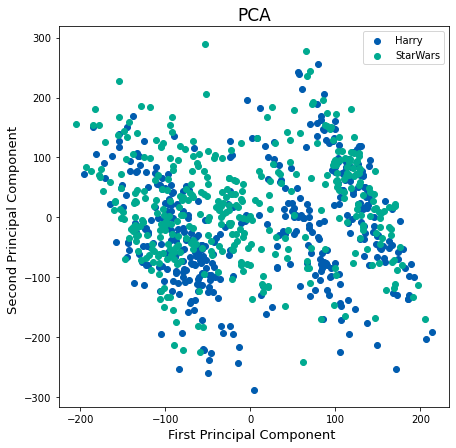

In [26]:
# return PCA data to X_pca
X_pca = visual_PCA(X_in, visual = True, output_data = True)

Variance of each component: [0.48218957 0.15858508]


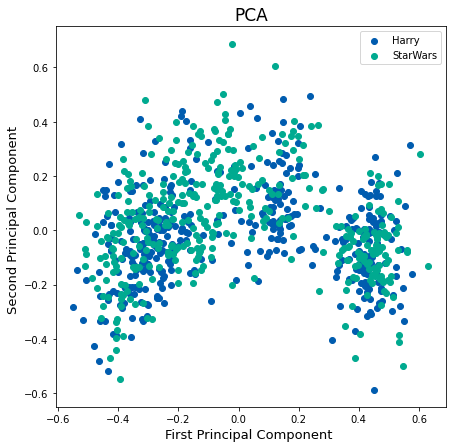

In [27]:
X_pca_minmax = visual_PCA(X_minmax, visual = True, output_data = True)

Variance of each component: [0.27956154 0.22714758]


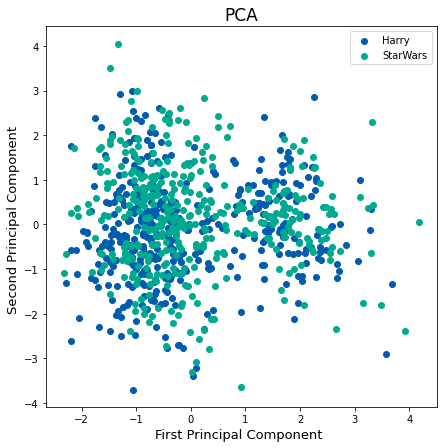

In [28]:
X_pca_zscore = visual_PCA(X_zscore, visual = True, output_data = True)

## 7.3 Methodology
### 7.3.1 Training

In [29]:
# Split the datasets which have been transformed

X_train_minmax, X_val_minmax, y_train_minmax, y_val_minmax = train_test_split(X_minmax,y_in,test_size=0.2, random_state = 3)
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(X_train_minmax,y_train_minmax,test_size=0.25, random_state = 4)


X_train_zscore, X_val_zscore, y_train_zscore, y_val_zscore = train_test_split(X_zscore,y_in,test_size=0.2, random_state = 3)
X_train_zscore, X_test_zscore, y_train_zscore, y_test_zscore = train_test_split(X_train_zscore,y_train_zscore,test_size=0.25, random_state = 4)

X_train_pca, X_val_pca, y_train_pca, y_val_pca = train_test_split(X_pca,y_in,test_size=0.2, random_state = 3)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_train_pca,y_train_pca,test_size=0.25, random_state = 4)

X_train_pca_minmax, X_val_pca_minmax, y_train_pca_minmax, y_val_pca_minmax = train_test_split(X_pca_minmax,y_in,test_size=0.2, random_state = 3)
X_train_pca_minmax, X_test_pca_minmax, y_train_pca_minmax, y_test_pca_minmax = train_test_split(X_train_pca_minmax,y_train_pca_minmax,test_size=0.25, random_state = 4)

X_train_pca_zscore, X_val_pca_zscore, y_train_pca_zscore, y_val_pca_zscore = train_test_split(X_pca_zscore,y_in,test_size=0.2, random_state = 3)
X_train_pca_zscore, X_test_pca_zscore, y_train_pca_zscore, y_test_pca_zscore = train_test_split(X_train_pca_zscore,y_train_pca_zscore,test_size=0.25, random_state = 4)

In [30]:
# Define a training function for efficiency


dataset = [[X_train, X_val, y_train, y_val, 'Initial'],
           [X_train_minmax, X_val_minmax, y_train_minmax, y_val_minmax, 'MinMax'],
           [X_train_zscore, X_val_zscore, y_train_zscore, y_val_zscore, 'Z-Score'],
           [X_train_pca, X_val_pca, y_train_pca, y_val_pca, 'PCA'],
           [X_train_pca_minmax, X_val_pca_minmax, y_train_pca_minmax, y_val_pca_minmax,'PCA (MinMax)'],
           [X_train_pca_zscore, X_val_pca_zscore, y_train_pca_zscore, y_val_pca_zscore,'PCA (Z-score)']]

def model_train (model_name):
    for i in dataset:
        model_name.fit(i[0],i[2])
        print('Training accuracy of {0} with {1} data is: {2:.3f}'.format(model_name, i[4], model_name.score(i[0], i[2])))
        print('Validation accuracy of {0} with {1} data is: {2:.3f}'.format(model_name, i[4], model_name.score(i[1], i[3])))
        print('******')

In [31]:
# 4th training (Transformation)
etc = ExtraTreesClassifier(n_estimators=31, random_state = 0)
model_train(etc)

Training accuracy of ExtraTreesClassifier(n_estimators=31, random_state=0) with Initial data is: 1.000
Validation accuracy of ExtraTreesClassifier(n_estimators=31, random_state=0) with Initial data is: 0.677
******
Training accuracy of ExtraTreesClassifier(n_estimators=31, random_state=0) with MinMax data is: 1.000
Validation accuracy of ExtraTreesClassifier(n_estimators=31, random_state=0) with MinMax data is: 0.677
******
Training accuracy of ExtraTreesClassifier(n_estimators=31, random_state=0) with Z-Score data is: 1.000
Validation accuracy of ExtraTreesClassifier(n_estimators=31, random_state=0) with Z-Score data is: 0.677
******
Training accuracy of ExtraTreesClassifier(n_estimators=31, random_state=0) with PCA data is: 1.000
Validation accuracy of ExtraTreesClassifier(n_estimators=31, random_state=0) with PCA data is: 0.598
******
Training accuracy of ExtraTreesClassifier(n_estimators=31, random_state=0) with PCA (MinMax) data is: 1.000
Validation accuracy of ExtraTreesClassifie

Now we know the most suitable dataset for ExtraTreesClassifier is Initial dataset.
Hence, we need to find the best hyperparameters via Initial dataset.

In [32]:
dataset = [[X_train, X_val, y_train, y_val, 'Initial']]

### 7.3.2 Optimisation & Validation

In [33]:
from sklearn.model_selection import GridSearchCV
def find_parameters (classifier, parameters, random = False):
    if random:
        cf = classifier(random_state=0)
    else:
        cf = classifier()
    cf_cv = GridSearchCV(cf, parameters)
    for i in dataset:
        cf_cv.fit(i[0],i[2])
        print('Best hyperparameter setting: {0}.'.format(cf_cv.best_estimator_))
        print('Average accuracy across folds with {1} data: {0}.'.format(cf_cv.best_score_, i[4]))
        print('Validation dataset accuracy with {1} data: {0}.'.format(cf_cv.score(i[1], i[3]),i[4]))
        print('******')

In [34]:
# Cross validation for ExtraTrees
find_parameters(ExtraTreesClassifier, {'n_estimators': np.arange(1,100,1)}, random = True)

Best hyperparameter setting: ExtraTreesClassifier(n_estimators=70, random_state=0).
Average accuracy across folds with Initial data: 0.6319727891156462.
Validation dataset accuracy with Initial data: 0.6585365853658537.
******


### 7.3.3 testing

In [35]:
etc = ExtraTreesClassifier(n_estimators = 70, random_state = 0)
etc.fit (X_train, y_train)
yv_etc = etc.predict(X_test)
print('Training accuracy of {0} with zscore data is: {1:.3f}'.format(etc, etc.score(X_train, y_train)))
print('Validation accuracy of {0} with zscore data is: {1:.3f}'.format(etc, etc.score(X_test, y_test)))

Training accuracy of ExtraTreesClassifier(n_estimators=70, random_state=0) with zscore data is: 1.000
Validation accuracy of ExtraTreesClassifier(n_estimators=70, random_state=0) with zscore data is: 0.616


#### 7.3.3.1 Voting Classifier
- From the basic part of the project, RandomForestClassifier has the 2nd best performance.
- Hence, it can be used for voting.

In [36]:
# Find the best hyperparameters for RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
find_parameters(RandomForestClassifier, {'n_estimators': np.arange(1,200,5)}, random = True)

Best hyperparameter setting: RandomForestClassifier(n_estimators=176, random_state=0).
Average accuracy across folds with Initial data: 0.6462585034013605.
Validation dataset accuracy with Initial data: 0.6646341463414634.
******


In [37]:
rfc = RandomForestClassifier(n_estimators=176, random_state = 0)
rfc.fit (X_train, y_train)
yv_rfc = rfc.predict(X_test)
print('Training accuracy of {0} with zscore data is: {1:.3f}'.format(rfc, rfc.score(X_train, y_train)))
print('Testing accuracy of {0} with zscore data is: {1:.3f}'.format(rfc, rfc.score(X_test, y_test)))

Training accuracy of RandomForestClassifier(n_estimators=176, random_state=0) with zscore data is: 1.000
Testing accuracy of RandomForestClassifier(n_estimators=176, random_state=0) with zscore data is: 0.622


In [38]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier
est_ensemble = VotingClassifier(estimators=[('etc', etc), ('rfc', rfc)], 
                                voting='soft', weights=[1,2],flatten_transform=True)
score_ensemble=est_ensemble.fit(X_train,y_train)
yv_vot = score_ensemble.predict(X_test)

In [39]:
from sklearn.metrics import classification_report

report_etc = classification_report(yv_etc, y_test, output_dict=True)
report_etc = pd.DataFrame(report_etc).transpose()
print ('ExtraTreesClassifier:\n', report_etc)
print('\n')

report_rfc = classification_report(yv_rfc, y_test, output_dict=True)
report_rfc = pd.DataFrame(report_rfc).transpose()
print ('Random Forest Classifier:\n', report_rfc)
print('\n')

report_vot = classification_report(yv_vot, y_test, output_dict=True)
report_vot = pd.DataFrame(report_vot).transpose()
print ('Vote system:\n', report_vot)

ExtraTreesClassifier:
               precision    recall  f1-score     support
Harry          0.590361  0.628205  0.608696   78.000000
StarWars       0.641975  0.604651  0.622754   86.000000
accuracy       0.615854  0.615854  0.615854    0.615854
macro avg      0.616168  0.616428  0.615725  164.000000
weighted avg   0.617427  0.615854  0.616068  164.000000


Random Forest Classifier:
               precision    recall  f1-score     support
Harry          0.614458  0.629630  0.621951   81.000000
StarWars       0.629630  0.614458  0.621951   83.000000
accuracy       0.621951  0.621951  0.621951    0.621951
macro avg      0.622044  0.622044  0.621951  164.000000
weighted avg   0.622136  0.621951  0.621951  164.000000


Vote system:
               precision    recall  f1-score     support
Harry          0.614458  0.637500  0.625767   80.000000
StarWars       0.641975  0.619048  0.630303   84.000000
accuracy       0.628049  0.628049  0.628049    0.628049
macro avg      0.628217  0.628274  0

#### 7.3.3.2 Compare with model trainend by initial dataset

In [40]:
# Reset the dataset.
X = np.array(features[col]).copy()
y = np.array(features['song']).copy()
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2, random_state = 3)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=0.25, random_state = 4)

In [41]:
# Control variable
etc = ExtraTreesClassifier(n_estimators = 18, random_state = 0)
etc.fit (X_train, y_train)
yv = etc.predict(X_test)
print('Training accuracy of {0} with zscore data is: {1:.3f}'.format(etc, etc.score(X_train, y_train)))
print('Testing accuracy of {0} with zscore data is: {1:.3f}'.format(etc, etc.score(X_test, y_test)))

report = classification_report(yv, y_test, output_dict=True)
report = pd.DataFrame(report).transpose()
print ('ExtraTreesClassifier:\n', report)
print('\n')

Training accuracy of ExtraTreesClassifier(n_estimators=18, random_state=0) with zscore data is: 1.000
Testing accuracy of ExtraTreesClassifier(n_estimators=18, random_state=0) with zscore data is: 0.551
ExtraTreesClassifier:
               precision    recall  f1-score     support
Harry          0.543478  0.602410  0.571429   83.000000
StarWars       0.560000  0.500000  0.528302   84.000000
accuracy       0.550898  0.550898  0.550898    0.550898
macro avg      0.551739  0.551205  0.549865  167.000000
weighted avg   0.551789  0.550898  0.549736  167.000000




In [42]:
print ('The improvement of Testing accuracy after Transform stage and Voting Classifier: ')
report_vot / report

The improvement of Testing accuracy after Transform stage and Voting Classifier: 


precision    recall  f1-score   support
Harry          1.130602  1.058250  1.095092  0.963855
StarWars       1.146384  1.238095  1.193074  1.000000
accuracy       1.140045  1.140045  1.140045  1.140045
macro avg      1.138612  1.139819  1.142162  0.982036
weighted avg   1.139118  1.140045  1.142531  0.982036

# 8 Results
- The Testing accuracy of the same model has increased by **14.00%** using **Transform Stage** and **Voting Classifier**.

# 9 Conclusions
- The Validation accuracy has improved by 17.74% with Transform Stage:
    - from 0.575 (All Features)  --> 0.599  (Features Selected) —-> 0.677 (Outlier Detection)
- The Testing accuracy has improved by 1.95% with Voting Classifier:
    - from 0.616 --> 0.628
***
- The reason why these steps can improve the accuracy:
    1. Features Selected:
        - Quantity do not equal Quality: redundant features can mislead the model training. Hence, they will have negative impacts on predictions.
        - Irrelevant features can result in overfitting. 
        - Not all features have the same weights.
    2. Outlier Detection:
        - If the outliers are non-randomly distributed, they can decrease normality.
        - It increases the error variance and reduces the accuracy of predictions.
        - They can cause bias and/or influence predictions.
    3. Voting Classifier:
        - It is an ensemble method that combines several base models to produce one optimal predictive model.

> Feature Selection to Improve Accuracy and Decrease Training Time: https://machinelearningmastery.com/feature-selection-to-improve-accuracy-and-decrease-training-time/

> What is an outlier? What are the causes and effects of outliers?: https://jovian.ai/forum/t/what-is-an-outlier-what-are-the-causes-and-effects-of-outliers/18416
    
    
***
- It seems like Random Forest Classifier has better performance than Extra Trees Classifier.
- However, this project aims to improve the accuracy of the same classifier(Extra Trees Classifier) with **Transform Stage** and **Voting Classifier** instead of **Model Selection**.
- Hence, the purpose is to improve the Extra Trees Classifier, which has been achieved based on the classification report.